# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import pandas as pd
file_path = './signnames.csv'

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])

# TODO: How many unique classes/labels there are in the dataset.
labels_id = pd.read_csv(file_path)
n_classes = labels_id.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

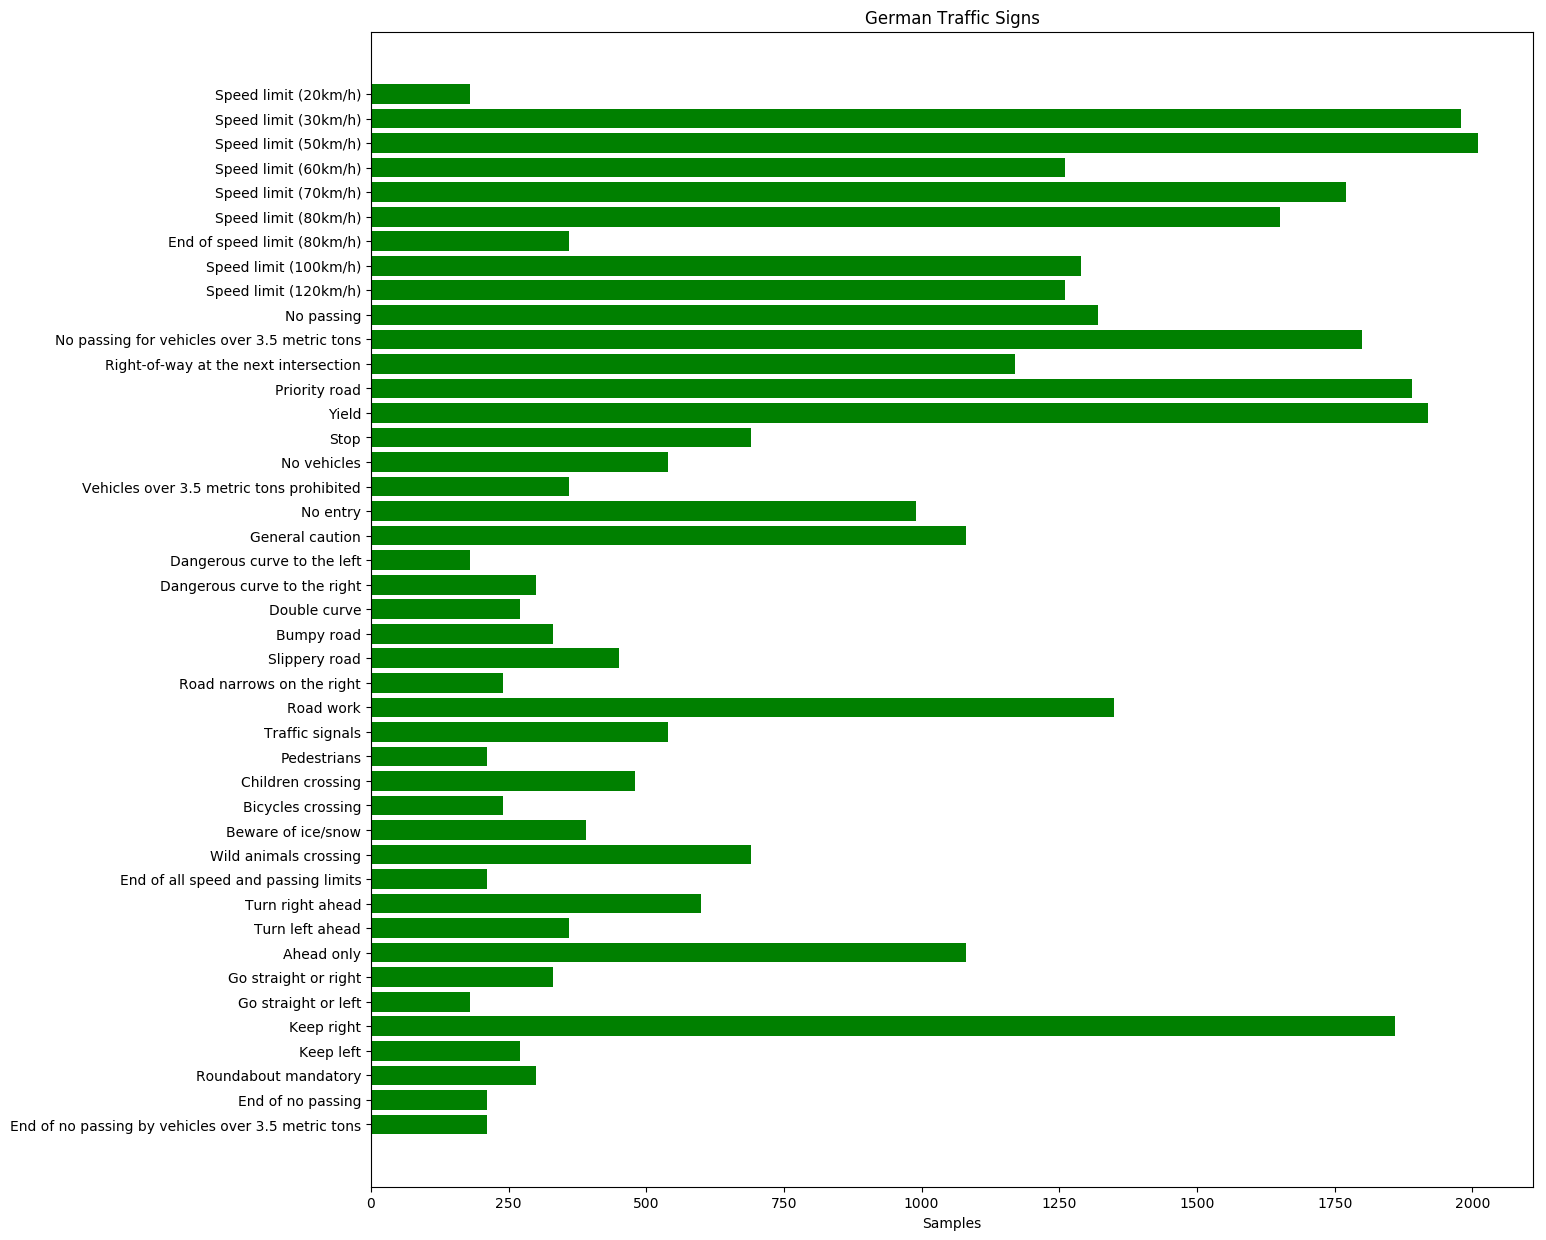

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import numpy as np

#Code modified from :http://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html
plt.rcdefaults()
fig, ax = plt.subplots(1,1, figsize=(15,15))

signs = labels_id.values[:,1]
y_pos = np.arange(len(signs))
samples = [len(y_train[y_train == i]) for i in range(n_classes)]

ax.barh(y_pos, samples, height=0.8, xerr=0.0001, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(signs)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Samples')
ax.set_title('German Traffic Signs')

plt.show()

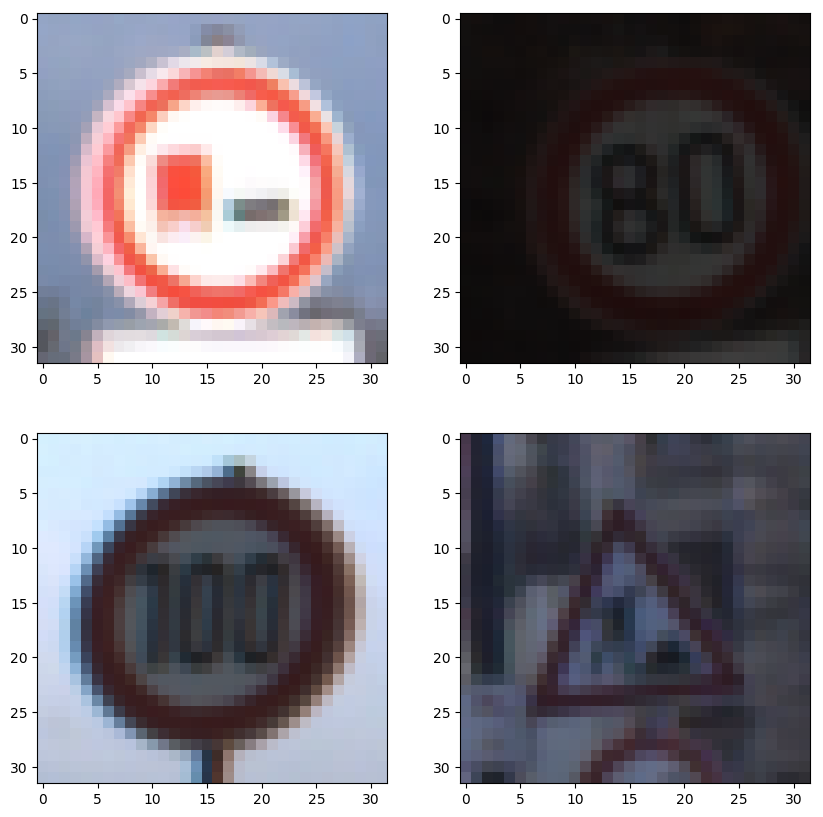

In [5]:
import random
plt.figure(4, figsize=(10,10))
plt.subplot(221)
plt.imshow(X_train[random.randint(0,len(X_train))])
plt.subplot(222)
plt.imshow(X_train[random.randint(0,len(X_train))])
plt.subplot(223)
plt.imshow(X_train[random.randint(0,len(X_train))])
plt.subplot(224)
plt.imshow(X_train[random.randint(0,len(X_train))])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
#import opencv to agrument data
import cv2

In [7]:
def generate_image(image, rotation, translation, transform):
    '''
    Generate new image randomly.    
    1- Image.
    2- Rotation angle(center rotation).
    3- Translation range.
    4- Transform range.  
    '''
    
    rows, cols, channel = image.shape
    # Rotation
    
    rot_angle = np.random.uniform(-rotation, rotation)   
    rot_mat = cv2.getRotationMatrix2D((cols/2, rows/2), rot_angle,1)
    img = cv2.warpAffine(image, rot_mat, (cols, rows))
    
    # Translation
    x = np.random.uniform(-translation, translation)
    y = np.random.uniform(-translation, translation)
    move_mat = np.float32([[1, 0, x],[0, 1, y]])
    img = cv2.warpAffine(img, move_mat, (cols, rows))
    
    # Transform
    points = np.float32([[4, 4],[24, 4],[4, 24]]) #top left, top right, bottom left
    point_trans1 = 4 + np.random.uniform(-transform, transform)
    point_trans2 = 24 + np.random.uniform(-transform, transform)
    points_trans = np.float32([[point_trans1, 4],[point_trans2, point_trans1],[4, point_trans2]])
    trans_mat = cv2.getAffineTransform(points, points_trans)    
    img = cv2.warpAffine(img, trans_mat, (cols, rows))
    
    # Brightness 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    bright_scale = np.random.uniform(0.3, 1.3)
    img[:,:,2] = img[:,:,2] * bright_scale
    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    
    return img

In [8]:
def data_augment(data, labels, classes, class_size = 5000):
    
    data_augmented, labels_augmented = list(data), list(labels)
    
    for i in range(classes):
        
        n_samples = len(labels[labels==i])

        if class_size < n_samples:
            
            continue
            
        else:
            samples_i = data[labels==i]
            
            for k in range(class_size - n_samples):
                
                new_image = generate_image(samples_i[k % n_samples], 10, 5, 4)
                data_augmented.append(new_image)
                labels_augmented.append(i)
                
        print('Class %d augmented. '%(i))
    return np.array(data_augmented), np.array(labels_augmented)

In [9]:
X_train_augmented, y_train_augmented = data_augment(X_train, y_train, n_classes)

Class 0 augmented. 
Class 1 augmented. 
Class 2 augmented. 
Class 3 augmented. 
Class 4 augmented. 
Class 5 augmented. 
Class 6 augmented. 
Class 7 augmented. 
Class 8 augmented. 
Class 9 augmented. 
Class 10 augmented. 
Class 11 augmented. 
Class 12 augmented. 
Class 13 augmented. 
Class 14 augmented. 
Class 15 augmented. 
Class 16 augmented. 
Class 17 augmented. 
Class 18 augmented. 
Class 19 augmented. 
Class 20 augmented. 
Class 21 augmented. 
Class 22 augmented. 
Class 23 augmented. 
Class 24 augmented. 
Class 25 augmented. 
Class 26 augmented. 
Class 27 augmented. 
Class 28 augmented. 
Class 29 augmented. 
Class 30 augmented. 
Class 31 augmented. 
Class 32 augmented. 
Class 33 augmented. 
Class 34 augmented. 
Class 35 augmented. 
Class 36 augmented. 
Class 37 augmented. 
Class 38 augmented. 
Class 39 augmented. 
Class 40 augmented. 
Class 41 augmented. 
Class 42 augmented. 


In [10]:
def randomize(data, labels):
    labels = labels.reshape(-1,1)
    permutation = np.random.permutation(labels.shape[0])
    shuffled_data = data[permutation,:]
    shuffled_labels = labels[permutation,:]
    return shuffled_data, shuffled_labels

In [11]:
X_train, y_train = randomize(X_train_augmented, y_train_augmented)

In [12]:
##There is not enough memory to store data.So, I convert data to tfrecords
import os
import sys
import tensorflow as tf

record_PATH = './traffic-signs-data/'

#Modified from tensorflow example code
#Ori code:
#https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/how_tos/reading_data/convert_to_records.py

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


def convert_to(data, labels, name):

    num_examples = len(labels)

    if data.shape[0] != num_examples:
        raise ValueError('Images size %d does not match label size %d.' %
                     (data.shape[0], num_examples))
    
    if not os.path.isdir(record_PATH): os.mkdir(record_PATH)
    filename = os.path.join(record_PATH, name + '.tfrecords')
    print('Writing', filename)
    writer = tf.python_io.TFRecordWriter(filename)
    for index in range(num_examples):
        image_raw = data[index].tostring()
        example = tf.train.Example(features=tf.train.Features(feature={
            'label': _int64_feature(int(labels[index])),
            'image_raw': _bytes_feature(image_raw)}))
        writer.write(example.SerializeToString())
    writer.close()

In [13]:
#!!!It takes 5 minutes to run this cell
#!!!Need 0.7GB hard disk space
convert_to(X_train, y_train, 'train')
convert_to(X_valid, y_valid, 'valid')
convert_to(X_test, y_test, 'test')

Writing ./traffic-signs-data/train.tfrecords
Writing ./traffic-signs-data/valid.tfrecords
Writing ./traffic-signs-data/test.tfrecords


### Check Point 1
###  Import & Load  

In [1]:
import os
import sys
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)   
    
X_valid, y_valid = (np.float32(valid['features']) - 128) / 128.0, valid['labels']
X_test, y_test = (np.float32(test['features']) - 128) / 128.0, test['labels']

In [3]:
y_valid = (np.arange(43) == y_valid[:, None]).astype(np.float32)
y_test = (np.arange(43) == y_test[:, None]).astype(np.float32)

### Model Architecture

In [4]:
#Help functions        
def residual_block(input_layer, out_channel, is_training, alpha, first_block=False, regularizer=None):
    '''
    Residual block of ResNetModel
    input_layer: 4D tensor
    out_channel: Output_channel
    param first_block: If it is the first residual block of network
    return: 4D tensor.
    '''
    input_channel = input_layer.get_shape().as_list()[-1]

    if input_channel * 2 == out_channel:
        increase_dim = True
        stride = 2
    elif input_channel == out_channel:
        increase_dim = False
        stride = 1

    with tf.variable_scope('conv1_in_block'):
        if first_block:
            conv1 = tf.layers.conv2d(input_layer, 
                                     out_channel, 
                                     3, 
                                     strides=1, 
                                     padding='SAME', 
                                     kernel_regularizer = regularizer)

        else:
            conv1 = bn_relu_conv_layer(input_layer, 
                                       out_channel, 
                                       3, 
                                       stride, 
                                       is_training, 
                                       alpha,
                                       regularizer = regularizer)

    with tf.variable_scope('conv2_in_block'):
        conv2 = bn_relu_conv_layer(conv1, out_channel, 3, 1, is_training, alpha, regularizer = regularizer)


    if increase_dim is True:
        pooled_input = tf.nn.avg_pool(input_layer, ksize=[1, 2, 2, 1],
                                      strides=[1, 2, 2, 1], padding='VALID')
        padded_input = tf.pad(pooled_input, [[0, 0], [0, 0], [0, 0], [input_channel // 2,
                                                                     input_channel // 2]])
    else:
        padded_input = input_layer

    output = conv2 + padded_input
    return output     

def fc_layer(input_layer, num_classes, is_training, alpha, regularizer=None):

    bn_layer = tf.layers.batch_normalization(input_layer, training=is_training)

    relu_layer = tf.maximum(alpha * bn_layer, bn_layer)

    global_pool = tf.reduce_mean(relu_layer, [1, 2])   
    
    out_put = tf.layers.dense(global_pool, num_classes, kernel_regularizer=regularizer)

    return out_put

def conv_bn_relu_layer(input_layer, filters, kernel_size, stride, is_training, alpha, regularizer=None):

    conv_layer = tf.layers.conv2d(input_layer,
                                  filters=filters,
                                  kernel_size=kernel_size, 
                                  strides=stride, 
                                  padding='SAME',
                                  kernel_regularizer = regularizer)

    bn_layer = tf.layers.batch_normalization(conv_layer, training=is_training)

    relu_layer = tf.maximum(alpha * bn_layer, bn_layer)

    return relu_layer


def bn_relu_conv_layer(input_layer, filters, kernel_size, stride, is_training, alpha, regularizer=None):

    bn_layer = tf.layers.batch_normalization(input_layer, training=is_training)

    relu_layer = tf.maximum(alpha * bn_layer, bn_layer)

    conv_layer = tf.layers.conv2d(relu_layer, 
                                  filters=filters, 
                                  kernel_size=kernel_size, 
                                  strides=stride, 
                                  padding='SAME',
                                  kernel_regularizer = regularizer)

    return conv_layer

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### build small Resnet model
###  Kaiming He, et al. "Deep Residual Learning for Image Recognition." arXiv arXiv:1512.03385.
###  Kaiming He, et al. "Identity Mappings in Deep Residual Networks" arXiv:1603.05027.

class ResNetModel(object):
    
    def __init__(self, is_training, deep_n = 5, num_classes=43, alpha=0.2, weight_decay = 0.0003):
        '''
        is_training:  As it say
        deep_n:  Used for the inference function.Total layers = 1 + 6 * deep_n
        num_classes: labels classes.
        alpha:LeakRelu parameter, x = tf.maximum(alpha * x, x).
        '''
        self.is_training = is_training
        self.num_classes = num_classes
        self.deep_n = deep_n
        self.alpha = alpha
        self.layers = []
        if weight_decay > 0:
            self.regularizer = tf.contrib.layers.l2_regularizer(weight_decay)
        else:
            self.regularizer = None
    def inference(self, input_tensor):
        '''
        input_tensor_batch: 4D tensor
        return: full-connected layer in the network.
        '''
        
        with tf.variable_scope('conv0'):

            layer = conv_bn_relu_layer(input_tensor, 16, 3, 1, self.is_training, self.alpha, regularizer=self.regularizer)
            self.layers.append(layer)
        for i in range(self.deep_n):

            with tf.variable_scope('conv1_%d' %i):

                if i == 0:
                    layer = residual_block(layer, 
                                           16, 
                                           self.is_training, 
                                           self.alpha, 
                                           first_block=True, 
                                           regularizer=self.regularizer)
                else:
                    layer = residual_block(layer, 16, self.is_training, self.alpha, regularizer=self.regularizer)
                self.layers.append(layer)
        for i in range(self.deep_n):

            with tf.variable_scope('conv2_%d' %i):

                layer = residual_block(layer, 32, self.is_training, self.alpha, regularizer=self.regularizer)
                self.layers.append(layer)
        for i in range(self.deep_n):

            with tf.variable_scope('conv3_%d' %i):

                layer = residual_block(layer, 64, self.is_training, self.alpha, regularizer=self.regularizer)
                self.layers.append(layer)
        with tf.variable_scope('fc'):

            fc = fc_layer(layer, self.num_classes, self.is_training, self.alpha, regularizer=self.regularizer)
            self.layers.append(fc)    
        self.prob = fc

        return self.prob

    def get_loss(self, input_x, input_y):
        
        y_predict = self.inference(input_x)

        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=input_y)
        
        
        regularization_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
        self.loss = tf.add_n([tf.reduce_mean(cross_entropy)] + regularization_losses)

        return self.loss
    
    def optimize(self, learning_rate):
        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(update_ops):
            
            train_op = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)

        return train_op

### Get batches

In [6]:
def read_image(filename_queue):  
    class Image(object):  
        pass  
    image = Image()     
    
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)

    features = tf.parse_single_example(  
    serialized_example,  
    features={
        'label': tf.FixedLenFeature([], tf.int64), 
        'image_raw': tf.FixedLenFeature([], tf.string),  
    })
   
    image.height = 32  
    image.width = 32  
    image.depth = 3 
    label_ = tf.cast(features['label'], tf.int64)      
    image_ = tf.decode_raw(features['image_raw'], tf.uint8)  
    #image_ = tf.image.decode_jpeg(features['image_raw'], channels=3)

    image_.set_shape([image.height * image.width * image.depth])
    image_ = tf.reshape(image_, [image.width, image.height, image.depth])

    image.label = label_  
    
    image.mat = (tf.cast(image_, tf.float32) - 128) / 128.0
    
    return image      
      
def get_batch_samples(filename_path, batch_size, shuffle_flag = False, min_samples_in_queue = 10000):  
 
    filename_queue = tf.train.string_input_producer([filename_path])
    img_obj = read_image(filename_queue)
    
    if shuffle_flag == False:  
        image_batch, label_batch = tf.train.batch(tensors=[img_obj.mat, img_obj.label],   
                                                  batch_size=batch_size,   
                                                  num_threads=4,   
                                                  capacity=min_samples_in_queue+3*batch_size)  
    else:  
        image_batch, label_batch = tf.train.shuffle_batch(tensors=[img_obj.mat, img_obj.label],   
                                                          batch_size=batch_size,   
                                                          num_threads=4,   
                                                          min_after_dequeue=min_samples_in_queue,  
                                                          capacity=min_samples_in_queue+3*batch_size)                                                      
                                                   
    return image_batch, tf.reshape(label_batch, shape=[batch_size])

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
def model_performance(sess, loss_op, acc_op, data, labels, batch_size = 128, classes = 43):
    
        acc = 0.0
        loss = 0.0
        data_len = (len(data) // batch_size) + 1
        
        for i in range(data_len):
            end = (i + 1) * batch_size
            if end > len(data):
                end = -1
            x_batch = data[i * batch_size:end]
            y_batch = labels[i * batch_size:end]            
            loss_batch, acc_batch = sess.run([loss_op, acc_op], feed_dict={is_training: False,
                                                                           x:x_batch,
                                                                           y:y_batch})
            acc = acc + acc_batch
            loss = loss + loss_batch
        return  loss / data_len, acc / data_len

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
learning_rate = 0.001
batch_size = 128
TRAIN_STEP = 3000
NUM_CLASSES = 43

checkpoint_path = './checkpoint/model.ckpt'

train_records = './traffic-signs-data/train.tfrecords'
valid_records = './traffic-signs-data/valid.tfrecords'
test_records = './traffic-signs-data/test.tfrecords'



tf.reset_default_graph()

is_training = tf.placeholder('bool', [])

x = tf.placeholder(tf.float32, shape=[None,32,32,3], name='input_x')
y = tf.placeholder(tf.float32, shape=[None,NUM_CLASSES], name='input_y')


x_batch_train, y_batch_train = get_batch_samples(train_records, batch_size, shuffle_flag=True)
y_batch_train = tf.one_hot(tf.reshape(y_batch_train, [-1, 1]), NUM_CLASSES)
y_batch_train = tf.reshape(y_batch_train, [-1, NUM_CLASSES])

model = ResNetModel(is_training=is_training)
loss = model.get_loss(x, y)
train_op = model.optimize(learning_rate)

correct_pred = tf.equal(tf.argmax(model.prob, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    coord = tf.train.Coordinator()
    #run queue
    threads = tf.train.start_queue_runners(sess,coord)
    
    for step in range(TRAIN_STEP):
        
        x_batch, y_batch = sess.run([x_batch_train,y_batch_train])

        _, train_loss, train_acc = sess.run([train_op, loss, accuracy], feed_dict={is_training: True,
                                                                                   x:x_batch,
                                                                                   y:y_batch})

        # test train performance
        if (step + 1) % 10 == 0 :
            format_str = ('Step: %d, Training loss = %.2f, Training accuracy = %.3f')
            print(format_str % (step, train_loss, train_acc))

        # test validation performance
        if (step + 1) % 200 == 0:
            valid_loss, valid_acc = model_performance(sess, loss, accuracy, X_valid, y_valid)            
            format_str = ('Step: %d, Validation loss = %.2f, Validation accuracy = %.3f')
            print(format_str % (step, valid_loss, valid_acc))
            
    # Test performance on test dataset.
    test_loss, test_acc = model_performance(sess, loss, accuracy, X_test, y_test)
    format_str = ('Test loss = %.2f, Test accuracy = %.3f')
    print(format_str % (test_loss, test_acc))
    
    # save model
    save_path = saver.save(sess, checkpoint_path)
    print("Model checkpoint saved at {}".format(save_path))       
    
    # Wait for threads to finish.
    coord.request_stop()
    coord.join(threads)
    sess.close()

Step: 9, Training loss = 3.86, Training accuracy = 0.031
Step: 19, Training loss = 3.64, Training accuracy = 0.102
Step: 29, Training loss = 3.52, Training accuracy = 0.055
Step: 39, Training loss = 3.35, Training accuracy = 0.141
Step: 49, Training loss = 3.32, Training accuracy = 0.125
Step: 59, Training loss = 3.26, Training accuracy = 0.141
Step: 69, Training loss = 3.13, Training accuracy = 0.203
Step: 79, Training loss = 3.16, Training accuracy = 0.141
Step: 89, Training loss = 2.98, Training accuracy = 0.172
Step: 99, Training loss = 2.86, Training accuracy = 0.227
Step: 109, Training loss = 2.95, Training accuracy = 0.141
Step: 119, Training loss = 2.81, Training accuracy = 0.211
Step: 129, Training loss = 2.79, Training accuracy = 0.203
Step: 139, Training loss = 2.67, Training accuracy = 0.227
Step: 149, Training loss = 2.73, Training accuracy = 0.234
Step: 159, Training loss = 2.51, Training accuracy = 0.219
Step: 169, Training loss = 2.61, Training accuracy = 0.164
Step: 17

### Check Point 1
###  Import & Load  

In [1]:
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
#Help functions        
def residual_block(input_layer, out_channel, is_training, alpha, first_block=False, regularizer=None):
    '''
    Residual block of ResNetModel
    input_layer: 4D tensor
    out_channel: Output_channel
    param first_block: If it is the first residual block of network
    return: 4D tensor.
    '''
    input_channel = input_layer.get_shape().as_list()[-1]

    if input_channel * 2 == out_channel:
        increase_dim = True
        stride = 2
    elif input_channel == out_channel:
        increase_dim = False
        stride = 1

    with tf.variable_scope('conv1_in_block'):
        if first_block:
            conv1 = tf.layers.conv2d(input_layer, 
                                     out_channel, 
                                     3, 
                                     strides=1, 
                                     padding='SAME', 
                                     kernel_regularizer = regularizer)

        else:
            conv1 = bn_relu_conv_layer(input_layer, 
                                       out_channel, 
                                       3, 
                                       stride, 
                                       is_training, 
                                       alpha,
                                       regularizer = regularizer)

    with tf.variable_scope('conv2_in_block'):
        conv2 = bn_relu_conv_layer(conv1, out_channel, 3, 1, is_training, alpha, regularizer = regularizer)


    if increase_dim is True:
        pooled_input = tf.nn.avg_pool(input_layer, ksize=[1, 2, 2, 1],
                                      strides=[1, 2, 2, 1], padding='VALID')
        padded_input = tf.pad(pooled_input, [[0, 0], [0, 0], [0, 0], [input_channel // 2,
                                                                     input_channel // 2]])
    else:
        padded_input = input_layer

    output = conv2 + padded_input
    return output     

def fc_layer(input_layer, num_classes, is_training, alpha, regularizer=None):

    bn_layer = tf.layers.batch_normalization(input_layer, training=is_training)

    relu_layer = tf.maximum(alpha * bn_layer, bn_layer)

    global_pool = tf.reduce_mean(relu_layer, [1, 2])   
    
    out_put = tf.layers.dense(global_pool, num_classes, kernel_regularizer=regularizer)

    return out_put

def conv_bn_relu_layer(input_layer, filters, kernel_size, stride, is_training, alpha, regularizer=None):

    conv_layer = tf.layers.conv2d(input_layer,
                                  filters=filters,
                                  kernel_size=kernel_size, 
                                  strides=stride, 
                                  padding='SAME',
                                  kernel_regularizer = regularizer)

    bn_layer = tf.layers.batch_normalization(conv_layer, training=is_training)

    relu_layer = tf.maximum(alpha * bn_layer, bn_layer)

    return relu_layer


def bn_relu_conv_layer(input_layer, filters, kernel_size, stride, is_training, alpha, regularizer=None):

    bn_layer = tf.layers.batch_normalization(input_layer, training=is_training)

    relu_layer = tf.maximum(alpha * bn_layer, bn_layer)

    conv_layer = tf.layers.conv2d(relu_layer, 
                                  filters=filters, 
                                  kernel_size=kernel_size, 
                                  strides=stride, 
                                  padding='SAME',
                                  kernel_regularizer = regularizer)

    return conv_layer

In [3]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### build small Resnet model
###  Kaiming He, et al. "Deep Residual Learning for Image Recognition." arXiv arXiv:1512.03385.
###  Kaiming He, et al. "Identity Mappings in Deep Residual Networks" arXiv:1603.05027.

class ResNetModel(object):
    
    def __init__(self, is_training, deep_n = 5, num_classes=43, alpha=0.2, weight_decay = 0.0003):
        '''
        is_training:  As it say
        deep_n:  Used for the inference function.Total layers = 1 + 6 * deep_n
        num_classes: labels classes.
        alpha:LeakRelu parameter, x = tf.maximum(alpha * x, x).
        '''
        self.is_training = is_training
        self.num_classes = num_classes
        self.deep_n = deep_n
        self.alpha = alpha
        self.layers = []
        if weight_decay > 0:
            self.regularizer = tf.contrib.layers.l2_regularizer(weight_decay)
        else:
            self.regularizer = None
    def inference(self, input_tensor):
        '''
        input_tensor_batch: 4D tensor
        return: full-connected layer in the network.
        '''
        
        with tf.variable_scope('conv0'):

            layer = conv_bn_relu_layer(input_tensor, 16, 3, 1, self.is_training, self.alpha, regularizer=self.regularizer)
            self.layers.append(layer)
        for i in range(self.deep_n):

            with tf.variable_scope('conv1_%d' %i):

                if i == 0:
                    layer = residual_block(layer, 
                                           16, 
                                           self.is_training, 
                                           self.alpha, 
                                           first_block=True, 
                                           regularizer=self.regularizer)
                else:
                    layer = residual_block(layer, 16, self.is_training, self.alpha, regularizer=self.regularizer)
                self.layers.append(layer)
        for i in range(self.deep_n):

            with tf.variable_scope('conv2_%d' %i):

                layer = residual_block(layer, 32, self.is_training, self.alpha, regularizer=self.regularizer)
                self.layers.append(layer)
        for i in range(self.deep_n):

            with tf.variable_scope('conv3_%d' %i):

                layer = residual_block(layer, 64, self.is_training, self.alpha, regularizer=self.regularizer)
                self.layers.append(layer)
        with tf.variable_scope('fc'):

            fc = fc_layer(layer, self.num_classes, self.is_training, self.alpha, regularizer=self.regularizer)
            self.layers.append(fc)    
        self.prob = fc

        return self.prob

    def get_loss(self, input_x, input_y):
        
        y_predict = self.inference(input_x)

        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=input_y)
        
        
        regularization_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
        self.loss = tf.add_n([tf.reduce_mean(cross_entropy)] + regularization_losses)

        return self.loss
    
    def optimize(self, learning_rate):
        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(update_ops):
            
            train_op = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)

        return train_op

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

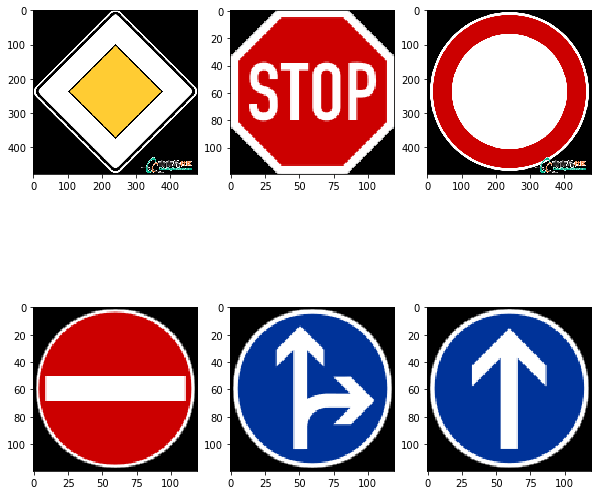

In [4]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
image_1 = cv2.cvtColor(cv2.imread('./examples/1.png'),cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(cv2.imread('./examples/2.png'),cv2.COLOR_BGR2RGB)
image_3 = cv2.cvtColor(cv2.imread('./examples/3.png'),cv2.COLOR_BGR2RGB)
image_4 = cv2.cvtColor(cv2.imread('./examples/4.png'),cv2.COLOR_BGR2RGB)
image_5 = cv2.cvtColor(cv2.imread('./examples/5.png'),cv2.COLOR_BGR2RGB)
image_6 = cv2.cvtColor(cv2.imread('./examples/6.png'),cv2.COLOR_BGR2RGB)

plt.figure(6, figsize=(10,10))
plt.subplot(231)
plt.imshow(image_1)
plt.subplot(232)
plt.imshow(image_2)
plt.subplot(233)
plt.imshow(image_3)
plt.subplot(234)
plt.imshow(image_4)
plt.subplot(235)
plt.imshow(image_5)
plt.subplot(236)
plt.imshow(image_6)
plt.show()

### Predict the Sign Type for Each Image

In [5]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#Image pre-processing
images = [image_1, image_2, image_3, image_4, image_5, image_6]
images_resized = []
for image in images:
    images_resized.append(cv2.resize(image,(32,32)))
images_resized = np.array(images_resized, dtype=np.float32)
images_resized = (images_resized - 128) /128.0

In [6]:
#Re-build model and load weights here
batch_size = 128
NUM_CLASSES = 43

checkpoint_path = './checkpoint/'
tf.reset_default_graph()

is_training = tf.placeholder('bool', [])

x = tf.placeholder(tf.float32, shape=[None,32,32,3], name='input_x')
y = tf.placeholder(tf.float32, shape=[None,NUM_CLASSES], name='input_y')

model = ResNetModel(is_training=is_training)
loss = model.get_loss(x, y)
pred = tf.nn.softmax(model.prob)
value, indice = tf.nn.top_k(pred, 5)

with tf.Session() as sess:
    saver = tf.train.Saver()
    ckpt = tf.train.get_checkpoint_state(checkpoint_path)
    if ckpt and ckpt.model_checkpoint_path:
        print('Restore the model from checkpoint %s' % ckpt.model_checkpoint_path)
        # Restores from checkpoint
        saver.restore(sess, ckpt.model_checkpoint_path)
    else:
        raise Exception('no checkpoint find')
        
    values, indices = sess.run([value, indice], feed_dict={x:images_resized, is_training:False})

Restore the model from checkpoint ./checkpoint/model.ckpt
INFO:tensorflow:Restoring parameters from ./checkpoint/model.ckpt


In [7]:
import pandas as pd
file_path = './signnames.csv'
labels_id = pd.read_csv(file_path)

for i in range(len(indices)):
    Descrip = labels_id[labels_id['ClassId'] == indices[i][0]]['SignName'].values[0]
    print('Prediction of image_%d is: %d   %s'%(i+1, indices[i][0], Descrip))

Prediction of image_1 is: 12   Priority road
Prediction of image_2 is: 14   Stop
Prediction of image_3 is: 15   No vehicles
Prediction of image_4 is: 17   No entry
Prediction of image_5 is: 34   Turn left ahead
Prediction of image_6 is: 35   Ahead only


### Analyze Performance

In [8]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print('It is 100% accurate on these new images.')

It is 100% accurate on these new images.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [9]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print('The top five softmax probabilities is: ')
print(values)
print('The top five predictions indices is: ')
print(indices)

The top five softmax probabilities is: 
[[  9.99992371e-01   2.32669072e-06   1.99107876e-06   1.20572861e-06
    4.62483172e-07]
 [  9.71549034e-01   2.33894233e-02   1.87158759e-03   9.28358524e-04
    7.47245154e-04]
 [  9.87964034e-01   8.81062541e-03   3.12646595e-03   2.51382007e-05
    1.62204778e-05]
 [  9.07094419e-01   4.73026671e-02   2.09473986e-02   5.70970587e-03
    3.77487717e-03]
 [  5.54404259e-01   2.98295021e-01   1.01201512e-01   2.86231562e-02
    6.44001132e-03]
 [  7.05627918e-01   2.26688474e-01   3.98247316e-02   1.68939717e-02
    3.90933733e-03]]
The top five predictions indices is: 
[[12 40 17 34 28]
 [14  9  0 10 17]
 [15  9 39 32  4]
 [17  9 14 10  0]
 [34 36 38 35 39]
 [35 34 36 38 39]]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [10]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, is_training: False})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

Restore the model from checkpoint ./checkpoint/model.ckpt
INFO:tensorflow:Restoring parameters from ./checkpoint/model.ckpt


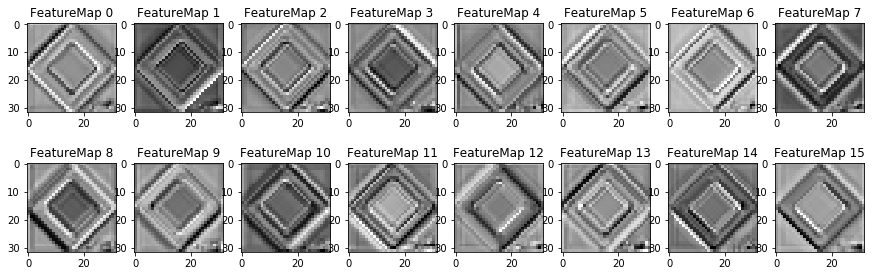

In [11]:
#Re-build model and load weights here
batch_size = 128
NUM_CLASSES = 43

checkpoint_path = './checkpoint/'
tf.reset_default_graph()

is_training = tf.placeholder('bool', [])

x = tf.placeholder(tf.float32, shape=[None,32,32,3], name='input_x')
y = tf.placeholder(tf.float32, shape=[None,NUM_CLASSES], name='input_y')

model = ResNetModel(is_training=is_training)
loss = model.get_loss(x, y)

with tf.Session() as sess:
    saver = tf.train.Saver()
    ckpt = tf.train.get_checkpoint_state(checkpoint_path)
    if ckpt and ckpt.model_checkpoint_path:
        print('Restore the model from checkpoint %s' % ckpt.model_checkpoint_path)
        # Restores from checkpoint
        saver.restore(sess, ckpt.model_checkpoint_path)
    else:
        raise Exception('no checkpoint find')
    outputFeatureMap(images_resized, model.layers[3], activation_min=-1, activation_max=-1 ,plt_num=1)